# Kuis 1

<hr>

## Kelompok 3
### Anggota Kelompok :
1. Chamillatul Luqiana Agustin
2. Irsyad Danisaputra
3. Ravi Wimar Afiansyah
4. Reza Arya Wijaya

<hr>

# Intro

Pada kuis ini, Anda diminta untuk melakukan klasifikasi citra wajah dengan menggunakan dataset Labeled Face in Wild (LFW).
Spesifikasi pengerjaan kuis yang harus dipehuni adalah,

1. Setiap label dari dataset LFW harus berisikan minimal 10 gambar (5 poin)
2. Citra yang digunakan merupakan citra RGB / color (5 poin)
3. (Opsional) Lakukan proses pra pengolahan data jika diperlukan (ekstra 10 poin)
4. (Wajib) Gunakan fitur histogram untuk setiap channel citra (35 poin)
5. (Wajib) Gunakan algoritma SVM sebagai model dasar (35 poin)
6. (Wajib) Gunakan metric akurasi, dan *classification report* untuk melihat performa model (20 poin)

## Challenge
Setelah menyelesaikan kuis berdasarkan spesifikasi wajib, Anda diperkenankan untuk

- Menggunakan fitur lain selain histogram (ekstra 20 poin)
- Menggunakan model lain selain SVM (ekstra 10 poin)
- Evalusi dengan metric lain ataupun report dengan *confusion matrix* (ekstra 10 poin)

# Boilerplate

Berikut merupakan boilerplate code yang dapat Anda gunakan sebagai acuan dasar pengerjaan kuis.
Anda diperkenankan untuk **menambah** ataupun **mengurangi** bagian boilerplate yang disediakan.

---

# Preparation

In [16]:
# Load required library
# Import Required Library
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

**Penjelasan:**

kode program tersebut mengimpor library-library penting untuk memproses data, membangun model machine learning (khususnya SVM), dan mengevaluasi performa model.
* **numpy (np)**: Digunakan untuk operasi numerik seperti array multidimensi.
* **pandas (pd)**: Digunakan untuk manipulasi dan analisis data menggunakan struktur data seperti DataFrame.
* **sklearn.datasets**: Modul dari scikit-learn untuk memuat dataset, termasuk fetch_lfw_people yang digunakan untuk memuat dataset Labeled Faces in the Wild.
* **sklearn.model_selection**: Modul untuk melakukan splitting data dan hyperparameter tuning, di sini digunakan train_test_split untuk membagi data.
* **sklearn.svm**: Modul untuk membuat model Support Vector Machine (SVM) dan di sini digunakan SVC untuk klasifikasi.
* **sklearn.metrics**: Modul untuk evaluasi model. Di sini digunakan confusion_matrix, accuracy_score, dan classification_report untuk mengukur performa model.
* **matplotlib.pyplot (plt)**: Digunakan untuk membuat visualisasi data seperti plot dan grafik.
* **seaborn (sns)**: Library visualisasi berbasis Matplotlib yang menyediakan tampilan visual yang lebih menarik.

# Load Data

In [17]:
# Load Dataset
# We will load dataset only for faces with contain min 10 images
# We also want to keep images in color; color=True
faces = fetch_lfw_people(min_faces_per_person=10, color=True)

# Check Faces
print(f'Total Label: {len(faces.target_names)}')
print(f'Data dimension: {faces.images.shape}')
print(f'Images flatten dimension: {faces.data.shape}')

Total Label: 158
Data dimension: (4324, 62, 47, 3)
Images flatten dimension: (4324, 8742)


**Penjelasan:**

Kode program tersebut digunakan untuk memuat dataset Labeled Faces in the Wild (LFW) dan menampilkan informasi tentang dataset yang telah dimuat.
* **faces = fetch_lfw_people(min_faces_per_person=10, color=True)**: Kode ini akan memuat dataset LFW dengan menggunakan fungsi fetch_lfw_people dari library scikit-learn.
  * **Parameter min_faces_per_person=10** digunakan untuk memuat data orang yang memiliki minimal 10 gambar di dataset.
  * **Parameter color=True** digunakan untuk memuat gambar dalam format berwarna (RGB).
* **print(f'Total Label: {len(faces.target_names)}')**: Menampilkan jumlah total label (orang) yang ada di dataset.
* **print(f'Data dimension: {faces.images.shape}')**: Menampilkan dimensi data gambar. Outputnya akan berupa tuple yang menunjukkan jumlah gambar, tinggi gambar, dan lebar gambar.
* **print(f'Images flatten dimension: {faces.data.shape}')**: Menampilkan dimensi data gambar yang telah di-flatten. Setiap gambar diubah menjadi array satu dimensi.

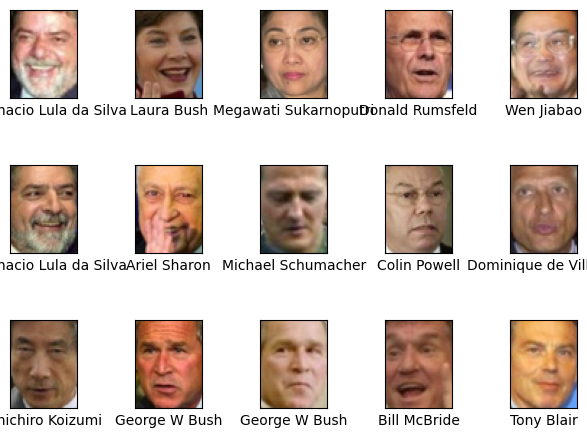

In [21]:
# Check by Plotted Images
# Generate random 15 images
rand_labels = [np.random.randint(0, len(faces.data)) for x in range(0,15)]

fig, ax = plt.subplots(3, 5)
fig.tight_layout()
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[rand_labels[i]], cmap='bone')
    axi.set(xticks=[], yticks=[],
            xlabel=faces.target_names[faces.target[rand_labels[i]]])

**Penjelasan:**

Kode program tersebut digunakan untuk menampilkan 15 gambar acak dari dataset LFW yang telah dimuat sebelumnya.
* **rand_labels = [np.random.randint(0, len(faces.data)) for x in range(0,15)]**: Kode ini akan menghasilkan list yang berisi 15 bilangan acak. Bilangan acak ini merupakan indeks untuk mengambil gambar dari dataset faces.data.
* **fig, ax = plt.subplots(3, 5)**: Membuat figure dan axes untuk menampilkan gambar. Parameter 3, 5 menunjukkan bahwa gambar akan ditampilkan dalam 3 baris dan 5 kolom (total 15 gambar).
* **fig.tight_layout()**: Menyesuaikan tata letak gambar agar tidak tumpang tindih.
* **for i, axi in enumerate(ax.flat):**: Melakukan perulangan untuk setiap gambar dan axes yang telah dibuat.
  * **axi.imshow(faces.images[rand_labels[i]], cmap='bone')**: Menampilkan gambar pada axes yang sesuai. Gambar diambil dari faces.images menggunakan indeks dari rand_labels. Parameter cmap='bone' digunakan untuk mengatur colormap gambar menjadi grayscale.
  * **axi.set(xticks=[], yticks=[], xlabel=faces.target_names[faces.target[rand_labels[i]]])**: Mengatur axes dengan menghilangkan ticks pada sumbu x dan y, dan menambahkan label nama orang yang ada di gambar.

# Preprocessing

2. Citra yang digunakan merupakan citra RGB / color
3. Proses pra pengolahan data (di sini kami membuat fungsi untuk mengubah citra gambar menjadi RGB)

In [22]:
'''
    Pada bagian ini Anda diperbolehkan untuk melakukan proses pra pengolahan data (preprocessing) sesuai dengan kebutuhan. Pra pengolahan data dapat berupa,

    1. Standardisasi nilai fitur ataupun label
    2. Penyesuaian ukuran gambar
    3. Perubahan colorspace gambar
    4. dsb
'''

import cv2

def convert_to_rgb(image):
    return cv2.applyColorMap((image * 255).astype(np.uint8), cv2.COLORMAP_JET)

**Penjelasan:**

Kode program tersebut mendefinisikan sebuah fungsi bernama convert_to_rgb yang bertujuan untuk mengubah citra menjadi RGB.
* **import cv2**: Mengimpor library OpenCV yang digunakan untuk pemrosesan gambar.
* **def convert_to_rgb(image):**: Mendeklarasikan fungsi convert_to_rgb yang menerima satu parameter, yaitu image.
  * **return cv2.applyColorMap((image * 255).astype(np.uint8), cv2.COLORMAP_JET)**:
    * **image * 255**: Mengubah rentang nilai piksel gambar dari 0-1 menjadi 0-255.
    * **.astype(np.uint8)**: Mengubah tipe data gambar menjadi uint8 yang merupakan tipe data integer 8-bit.
    * **cv2.applyColorMap(..., cv2.COLORMAP_JET)**: Menerapkan colormap JET pada gambar. Colormap JET adalah colormap yang memetakan nilai piksel ke dalam rentang warna.

Jadi, fungsi tersebut akan menerima sebuah gambar, lalu mengubahnya menjadi RGB. Namun, fungsi tersebut menggunakan cv2.COLORMAP_JET yang sebenarnya memetakan nilai piksel ke dalam rentang warna, bukan mengubah colorspace gambar secara langsung.

# Features Extraction

4. Gunakan fitur histogram untuk setiap channel citra (di sini kami membuat function untuk mengekstrak histogram dari sebuah gambar)

In [23]:
'''
    Pada bagian ini, lakukan proses ekstraksi fitur yang diminta, yaitu histogram tiap channel.
    Terdapat banyak cara untuk melakukan ekstraksi fitur histrogram.

    Hints:
        Salah satu cara untuk melakukan ekstraksi fitur histrogram adalah,
        Anda dapat menggunakan fungsi np.histrogram dari library numpy
'''

from sklearn.preprocessing import StandardScaler

def extract_histograms(image):
    """Extract color histograms from an RGB image."""
    hist_features = []
    for i in range(3):  # Loop over R, G, B channels
        hist, _ = np.histogram(image[:, :, i], bins=256, range=(0, 256))
        hist_features.extend(hist)
    return np.array(hist_features)

**Penjelasan:**

Kode program tersebut mendefinisikan fungsi extract_histograms yang digunakan untuk mengekstrak fitur histogram dari sebuah gambar RGB.
* **from sklearn.preprocessing import StandardScaler:** Mengimpor class StandardScaler dari scikit-learn yang digunakan untuk standarisasi data.
* **def extract_histograms(image):**: Mendeklarasikan fungsi extract_histograms yang menerima satu parameter, yaitu image.
  * **hist_features = []**: Membuat list kosong untuk menyimpan fitur histogram.
  * **for i in range(3):**: Melakukan perulangan untuk setiap channel warna (R, G, B).
    * **hist, _ = np.histogram(image[:, :, i], bins=256, range=(0, 256))**: Menghitung histogram untuk channel warna ke-i. Parameter bins=256 menentukan jumlah bin histogram, dan range=(0, 256) menentukan rentang nilai piksel.
    * **hist_features.extend(hist)**: Menambahkan nilai histogram ke dalam list hist_features.
  * **return np.array(hist_features)**: Mengembalikan list hist_features yang telah diubah menjadi array numpy.

Jadi, fungsi tersebut akan menerima sebuah gambar RGB dan mengembalikan fitur histogram dari setiap channel warna (merah, hijau, dan biru).

proses pengekstrakan fitur histogram dengan memanggil function extract_histogram

In [78]:
# mengatur jumlah minimal gambar per label menjadi 150 untuk menaikkan/membuat performa model lebih baik
faces = fetch_lfw_people(min_faces_per_person=150, resize=0.4)

print(f'Total Label: {len(faces.target_names)}')

X = faces.images
y = faces.target

std = StandardScaler()

X_hist_features = np.array([extract_histograms(convert_to_rgb(img)) for img in X])
# X_hist_features = np.array([extract_histograms(img) for img in X])
X_hist_features_std = std.fit_transform(X_hist_features)

Total Label: 2


**Penjelasan:**

Kode program tersebut memuat ulang dataset LFW dengan jumlah minimum gambar per label yang lebih tinggi, kemudian mengekstrak fitur histogram dan melakukan standarisasi data.
* **faces = fetch_lfw_people(min_faces_per_person=150, resize=0.4)**: Memuat ulang dataset LFW.
  * Parameter **min_faces_per_person=150** mengatur jumlah minimum gambar per label menjadi 150.
  * Parameter **resize=0.4** mengubah ukuran gambar menjadi 40% dari ukuran aslinya.
* **print(f'Total Label: {len(faces.target_names)}'):** Menampilkan jumlah total label (orang) di dataset.
* **X = faces.images**: Menyimpan data gambar ke dalam variabel X.
* **y = faces.target**: Menyimpan label (target) ke dalam variabel y.
* **std = StandardScaler()**: Membuat objek StandardScaler untuk standarisasi data.
* **X_hist_features = np.array([extract_histograms(convert_to_rgb(img)) for img in X])**: Mengekstrak fitur histogram untuk setiap gambar di X menggunakan fungsi extract_histograms dan convert_to_rgb, kemudian menyimpan hasilnya dalam array numpy X_hist_features.
* **X_hist_features_std = std.fit_transform(X_hist_features)**: Melakukan standarisasi data pada X_hist_features menggunakan objek std dan menyimpan hasilnya dalam X_hist_features_std.

# Build Model

5. Gunakan algoritma SVM sebagai model dasar

In [79]:
'''
    Pada bagian ini lakukan proses pembuatan model,

    1. Pembuatan data training dan data testing
    2. Pembuatan objek model
    3. Proses fitting model
'''

from sklearn.model_selection import GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(X_hist_features_std, y, test_size=0.2, random_state=100)

model = SVC(kernel='rbf', C=3, gamma=0.001)
model.fit(X_train, y_train)

# y_pred_train = model.predict(X_train)
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

**Penjelasan:**

Kode program tersebut melakukan pembagian data menjadi data latih dan data uji, kemudian membuat dan melatih model SVM.
* **from sklearn.model_selection import GridSearchCV**: Mengimpor class GridSearchCV dari scikit-learn yang digunakan untuk hyperparameter tuning.
* **X_train, X_test, y_train, y_test = train_test_split(X_hist_features_std, y, test_size=0.2, random_state=100)**: Membagi data X_hist_features_std dan y menjadi data latih (train) dan data uji (test) dengan rasio 80:20.
  * Parameter **test_size=0.2** menentukan proporsi data uji sebesar 20%.
  * Parameter **random_state=100** menjamin bahwa pembagian data akan selalu sama setiap kali kode dijalankan.
* **model = SVC(kernel='rbf', C=3, gamma=0.001)**: Membuat objek model SVM dengan kernel RBF (Radial Basis Function).
  * Parameter **C=3** dan **gamma=0.001** adalah hyperparameter model SVM.
* **model.fit(X_train, y_train)**: Melatih model SVM menggunakan data latih X_train dan y_train.
* **y_pred_train = model.predict(X_train)**: Melakukan prediksi pada data latih dan menyimpan hasilnya dalam y_pred_train.
* **y_pred_test = model.predict(X_test)**: Melakukan prediksi pada data uji dan menyimpan hasilnya dalam y_pred_test.

Jadi, kode tersebut mempersiapkan dan melatih model SVM untuk melakukan klasifikasi. Model ini kemudian digunakan untuk memprediksi label pada data latih dan data uji.

# Evaluation

6. Gunakan metric akurasi, dan classification report untuk melihat performa model

In [80]:
'''
    Pada bagian ini, lakukan evaluasi terhadap data training dan data testing
    dengan menggunakan metric akurasi dan juga classfication report

    Hints:
        Anda dapat menggunakan referensi Jobseet 4 Percobaan 5
'''

from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X_train, y_train, cv=5)
print(f'Mean CV accuracy: {scores.mean()}')

acc_train = accuracy_score(y_train,y_pred_train)
acc_test = accuracy_score(y_test, y_pred_test)

print(f'Akurasi prediksi data training: {acc_train*100:.2f}%')
print(f'Akurasi prediksi data test: {acc_test*100:.2f}%')

print("\nClassification Report Data Train:")
print(classification_report(y_train, y_pred_train, target_names=faces.target_names))

print("\nClassification Report Data Test:")
print(classification_report(y_test, y_pred_test, target_names=faces.target_names))

Mean CV accuracy: 0.6896041583366654
Akurasi prediksi data training: 76.63%
Akurasi prediksi data test: 70.13%

Classification Report Data Train:
               precision    recall  f1-score   support

 Colin Powell       1.00      0.24      0.38       187
George W Bush       0.75      1.00      0.86       425

     accuracy                           0.77       612
    macro avg       0.87      0.62      0.62       612
 weighted avg       0.83      0.77      0.71       612


Classification Report Data Test:
               precision    recall  f1-score   support

 Colin Powell       0.80      0.08      0.15        49
George W Bush       0.70      0.99      0.82       105

     accuracy                           0.70       154
    macro avg       0.75      0.54      0.48       154
 weighted avg       0.73      0.70      0.61       154



**Penjelasan:**

Kode program tersebut mengevaluasi performa model yang telah dilatih menggunakan cross-validation, menghitung akurasi, dan menampilkan classification report.
* **from sklearn.model_selection import cross_val_score**: Mengimpor fungsi cross_val_score untuk melakukan cross-validation.
* **scores = cross_val_score(model, X_train, y_train, cv=5)**: Melakukan 5-fold cross-validation pada model menggunakan data latih.
* **print(f'Mean CV accuracy: {scores.mean()}')**: Menampilkan rata-rata akurasi dari hasil cross-validation.
* **acc_train = accuracy_score(y_train,y_pred_train)**: Menghitung akurasi model pada data latih.
* **acc_test = accuracy_score(y_test, y_pred_test)**: Menghitung akurasi model pada data uji.
* **print(f'Akurasi prediksi data training: {acc_train*100:.2f}%')**: Menampilkan akurasi data latih dalam persentase.
* **print(f'Akurasi prediksi data test: {acc_test*100:.2f}%')**: Menampilkan akurasi data uji dalam persentase.
* **print("\nClassification Report Data Train:")**: Menampilkan judul untuk classification report data latih.
* **print(classification_report(y_train, y_pred_train, target_names=faces.target_names))**: Menampilkan classification report untuk data latih. Classification report berisi informasi seperti precision, recall, f1-score, dan support untuk setiap kelas.
* **print("\nClassification Report Data Test:")**: Menampilkan judul untuk classification report data uji.
* **print(classification_report(y_test, y_pred_test, target_names=faces.target_names))**: Menampilkan classification report untuk data uji.

Jadi, kode tersebut mengukur performa model dengan beberapa metrik seperti akurasi dan classification report. Cross-validation digunakan untuk mendapatkan estimasi performa model yang lebih robust.

Evaluasi dengan metric lain ataupun report dengan confusion matrix

Text(113.9222222222222, 0.5, 'predicted label')

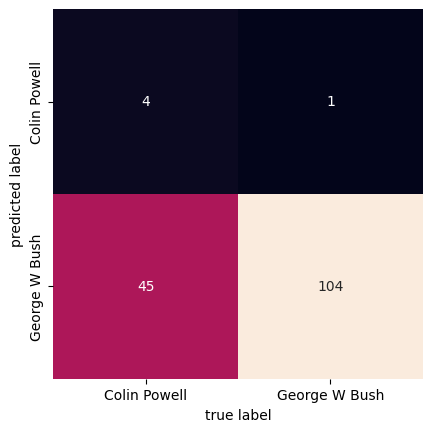

In [81]:
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(y_test, y_pred_test)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=faces.target_names,
            yticklabels=faces.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label')

**Penjelasan:**

Kode program tersebut membuat dan menampilkan confusion matrix untuk mengevaluasi performa model klasifikasi.
* **from sklearn.metrics import confusion_matrix**: Mengimpor fungsi confusion_matrix dari scikit-learn.
* **mat = confusion_matrix(y_test, y_pred_test)**: Menghitung confusion matrix dengan membandingkan label sebenarnya (y_test) dengan label prediksi (y_pred_test). Hasilnya disimpan dalam variabel mat.
* **sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=faces.target_names, yticklabels=faces.target_names)**: Membuat heatmap dari confusion matrix menggunakan library Seaborn.
  * **mat.T**: Transpose matrix mat.
  * **square=True**: Membuat sel heatmap berbentuk persegi.
  * **annot=True**: Menampilkan nilai di setiap sel.
  * **fmt='d'**: Format nilai sebagai integer.
  * **cbar=False**: Menonaktifkan colorbar.
  * **xticklabels=faces.target_names**: Menggunakan nama label sebagai label di sumbu x.
  * **yticklabels=faces.target_names**: Menggunakan nama label sebagai label di sumbu y.
* **plt.xlabel('true label')**: Menambahkan label "true label" pada sumbu x.
* **plt.ylabel('predicted label')**: Menambahkan label "predicted label" pada sumbu y.

<hr>

# Challenge

**menggunakan fitur lain selain histogram**

In [85]:
from skimage.feature import hog
from sklearn.model_selection import train_test_split

# mengatur min_faces_per_person menjadi 90 agar model bisa perform lebih baik
faces = fetch_lfw_people(min_faces_per_person=90, resize=0.4)

print(f"Total Label: {len(faces.target_names)}")

X = faces.data
y = faces.target

def extract_hog_features(images):
    hog_features = []
    for image in images:
        image = image.reshape(50, 37)  
        hog_feature = hog(image, pixels_per_cell=(8, 8),
                          cells_per_block=(2, 2), visualize=False)
        hog_features.append(hog_feature)
    return np.array(hog_features)

X_hog = extract_hog_features(X)

Total Label: 5


**Penjelasan:**

Kode program tersebut mengimpor library yang dibutuhkan, memuat dataset LFW, dan mendefinisikan fungsi untuk mengekstrak fitur HOG (Histogram of Oriented Gradients).
* **from skimage.feature import hog**: Mengimpor fungsi hog dari library scikit-image untuk menghitung fitur HOG.
* **from sklearn.model_selection import train_test_split**: Mengimpor fungsi train_test_split untuk membagi data.
* **faces = fetch_lfw_people(min_faces_per_person=90, resize=0.4)**: Memuat dataset LFW.
  * **min_faces_per_person=90**: Memuat data orang yang memiliki minimal 90 gambar.
  * **resize=0.4**: Mengubah ukuran gambar menjadi 40% dari ukuran aslinya.
* **print(f"Total Label: {len(faces.target_names)}")**: Menampilkan jumlah total label.
* **X = faces.data**: Menyimpan data gambar ke dalam variabel X.
* **y = faces.target**: Menyimpan label (target) ke dalam variabel y.
* **def extract_hog_features(images):**: Mendeklarasikan fungsi extract_hog_features yang menerima satu parameter images.
  * **hog_features = []**: Membuat list kosong untuk menyimpan fitur HOG.
  * **for image in images:**: Melakukan perulangan untuk setiap gambar di images.
    * **image = image.reshape(50, 37)**: Mengubah bentuk gambar menjadi 50x37 piksel.
    * **hog_feature = hog(image, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=False)**: Menghitung fitur HOG untuk setiap gambar menggunakan fungsi hog.
      * **pixels_per_cell=(8, 8)**: Ukuran sel dalam piksel.
      * **cells_per_block=(2, 2)**: Ukuran blok dalam sel.
      * **visualize=False**: Menonaktifkan visualisasi HOG.
    * **hog_features.append(hog_feature)**: Menambahkan fitur HOG ke dalam list hog_features.
    * **return np.array(hog_features)**: Mengembalikan list hog_features yang telah diubah menjadi array numpy.
* **X_hog = extract_hog_features(X)**: Memanggil fungsi extract_hog_features dengan data gambar X dan menyimpan fitur HOG dalam variabel X_hog.

**menggunakan model lain selain SVM**

In [86]:
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(X_hog, y, test_size=0.2, random_state=42)

model_pipeline = Pipeline([
    ('pca', PCA(n_components=150)),
    ('svc', SVC(kernel='rbf', C=100, gamma=0.1))
])

model_pipeline.fit(X_train, y_train)

yhat_train = model_pipeline.predict(X_train)
yhat_test = model_pipeline.predict(X_test)

acc_train = accuracy_score(y_train,yhat_train)
acc_test = accuracy_score(y_test, yhat_test)

print(f'Akurasi prediksi data training: {acc_train*100:.2f}%')
print(f'Akurasi prediksi data test: {acc_test*100:.2f}%')

print("\nClassification Report Data Train:")
print(classification_report(y_train, yhat_train, target_names=faces.target_names))

print("\nClassification Report Data Test:")
print(classification_report(y_test, yhat_test, target_names=faces.target_names))

Akurasi prediksi data training: 100.00%
Akurasi prediksi data test: 94.30%

Classification Report Data Train:
                   precision    recall  f1-score   support

     Colin Powell       1.00      1.00      1.00       186
  Donald Rumsfeld       1.00      1.00      1.00        96
    George W Bush       1.00      1.00      1.00       424
Gerhard Schroeder       1.00      1.00      1.00        87
       Tony Blair       1.00      1.00      1.00       119

         accuracy                           1.00       912
        macro avg       1.00      1.00      1.00       912
     weighted avg       1.00      1.00      1.00       912


Classification Report Data Test:
                   precision    recall  f1-score   support

     Colin Powell       0.94      0.98      0.96        50
  Donald Rumsfeld       0.95      0.80      0.87        25
    George W Bush       0.93      0.99      0.96       106
Gerhard Schroeder       1.00      0.86      0.93        22
       Tony Blair       0.

**Penjelasan:**

Kode program tersebut mendefinisikan pipeline yang terdiri dari PCA (Principal Component Analysis) dan SVM (Support Vector Machine), kemudian melatih pipeline tersebut menggunakan data yang telah dibagi.
* **from sklearn.decomposition import PCA**: Mengimpor class PCA untuk reduksi dimensi.
* **from sklearn.pipeline import Pipeline**: Mengimpor class Pipeline untuk membuat pipeline model.
* **from sklearn.model_selection import GridSearchCV**: Mengimpor class GridSearchCV untuk hyperparameter tuning (walaupun tidak digunakan dalam kode ini).
* **X_train, X_test, y_train, y_test = train_test_split(X_hog, y, test_size=0.2, random_state=42)**: Membagi data fitur HOG (X_hog) dan label (y) menjadi data latih dan data uji dengan rasio 80:20.
* **model_pipeline = Pipeline([('pca', PCA(n_components=150)), ('svc', SVC(kernel='rbf', C=100, gamma=0.1))])**: Membuat pipeline dengan dua tahapan:
  * **PCA(n_components=150)**: Reduksi dimensi dengan PCA, mengambil 150 komponen utama.
  * **SVC(kernel='rbf', C=100, gamma=0.1)**: Model SVM dengan kernel RBF dan hyperparameter C=100 dan gamma=0.1.
* **model_pipeline.fit(X_train, y_train)**: Melatih pipeline model menggunakan data latih.
* **yhat_train = model_pipeline.predict(X_train)**: Melakukan prediksi pada data latih menggunakan pipeline dan menyimpan hasilnya dalam yhat_train.
* **yhat_test = model_pipeline.predict(X_test)**: Melakukan prediksi pada data uji menggunakan pipeline dan menyimpan hasilnya dalam yhat_test.
* **acc_train = accuracy_score(y_train,yhat_train)**: Menghitung akurasi prediksi pada data latih.
* **acc_test = accuracy_score(y_test, yhat_test)**: Menghitung akurasi prediksi pada data uji.
* **print(f'Akurasi prediksi data training: {acc_train*100:.2f}%')**: Menampilkan akurasi data latih.
* **print(f'Akurasi prediksi data test: {acc_test*100:.2f}%')**: Menampilkan akurasi data uji.
* **print("\nClassification Report Data Train:")**: Menampilkan judul untuk classification report data latih.
* **print(classification_report(y_train, yhat_train, target_names=faces.target_names))**: Menampilkan classification report data latih.
  * **y_train**: Label sebenarnya dari data latih.
  * **yhat_train**: Label prediksi dari data latih.
  * **target_names=faces.target_names**: Menampilkan nama-nama target/label.
* **print("\nClassification Report Data Test:")**: Menampilkan judul untuk classification report data uji.
* **print(classification_report(y_test, yhat_test, target_names=faces.target_names))**: Menampilkan classification report data uji.
  * **y_test**: Label sebenarnya dari data uji.
  * **yhat_test**: Label prediksi dari data uji.
  * **target_names=faces.target_names**: Menampilkan nama-nama target/label.

Text(113.92222222222219, 0.5, 'predicted label')

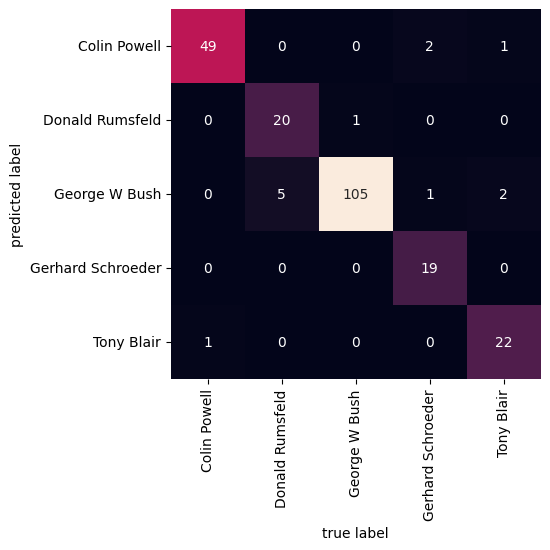

In [87]:
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(y_test, yhat_test)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=faces.target_names,
            yticklabels=faces.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label')

**Penjelasan:**

Kode program tersebut membuat dan menampilkan confusion matrix untuk mengevaluasi performa model klasifikasi.
* **from sklearn.metrics import confusion_matrix**: Mengimpor fungsi confusion_matrix dari scikit-learn.
* **mat = confusion_matrix(y_test, yhat_test)**: Menghitung confusion matrix dengan membandingkan label sebenarnya (y_test) dengan label prediksi (yhat_test). Hasilnya disimpan dalam variabel mat.
* **sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=faces.target_names, yticklabels=faces.target_names)**: Membuat heatmap dari confusion matrix menggunakan library Seaborn.
  * **mat.T**: Transpose matrix mat.
  * **square=True**: Membuat sel heatmap berbentuk persegi.
  * **annot=True**: Menampilkan nilai di setiap sel.
  * **fmt='d'**: Format nilai sebagai integer.
  * **cbar=False**: Menonaktifkan colorbar.
  * **xticklabels=faces.target_names**: Menggunakan nama label sebagai label di sumbu x.
  * **yticklabels=faces.target_names**: Menggunakan nama label sebagai label di sumbu y.
* **plt.xlabel('true label')**: Menambahkan label "true label" pada sumbu x.
* **plt.ylabel('predicted label')**: Menambahkan label "predicted label" pada sumbu y.

Jadi, Confusion matrix memberikan visualisasi yang mudah dipahami tentang performa model. Kita dapat melihat jumlah prediksi yang benar dan salah untuk setiap kelas, serta jenis kesalahan yang dilakukan oleh model.